In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import numpy as np
import sklearn as sk

In [2]:
def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
        alpha=1.0, linewidth=1, marker='o',
        s=55, label='test set')

In [3]:
train_df=pd.read_csv('train_titanic_preprocessed.csv')
test_df=pd.read_csv('test_titanic_preprocessed.csv')

In [4]:
Titanic_train_X = train_df.drop("Survived", axis=1)
Titanic_train_Y = train_df["Survived"]
Titanic_test_X  = test_df.drop("PassengerId", axis=1).copy()
Titanic_train_X.shape,Titanic_train_Y.shape,Titanic_test_X.shape

((891, 8), (891,), (418, 8))

In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Titanic_train_X, Titanic_train_Y, test_size=0.3, random_state=0)

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train, Y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [7]:
y_pred = ppn.predict(X_test)
print('Misclassified samples: %d' % (Y_test != y_pred).sum())

Misclassified samples: 56


In [8]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(Y_test, y_pred))

Accuracy: 0.79


In [54]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

82.180000000000007

In [10]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.078771
5,Title,0.613440
4,Embarked,0.268914
3,Fare,0.228838
7,IsAlone,-0.373229
6,FamilySize,-0.523619
2,Age,-0.603226
0,Pclass,-0.829904


In [50]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(), param_grid)
gs=clf.fit(X_train,Y_train)
print(gs.grid_scores_)
print(gs.best_params_)
print(gs.best_score_)

[mean: 0.62279, std: 0.01522, params: {'C': 0.001}, mean: 0.79133, std: 0.02354, params: {'C': 0.01}, mean: 0.82986, std: 0.00889, params: {'C': 0.1}, mean: 0.82183, std: 0.02326, params: {'C': 1}, mean: 0.82343, std: 0.02525, params: {'C': 10}, mean: 0.82343, std: 0.02525, params: {'C': 100}, mean: 0.82343, std: 0.02525, params: {'C': 1000}]
{'C': 0.1}
0.8298555377207063


In [55]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
print("Accuracy on the training set: {0:.3f}".format(decision_tree.score(X_train,Y_train)))
print("Accuracy on test set: {0:.3f}".format(decision_tree.score(X_test,Y_test)))

Accuracy on the training set: 0.888
Accuracy on test set: 0.825


In [56]:
from sklearn.tree import export_graphviz
export_graphviz(decision_tree,out_file='tree.odt',class_names=['0','1'],feature_names=Titanic_train_X.columns,impurity=False,filled=True)

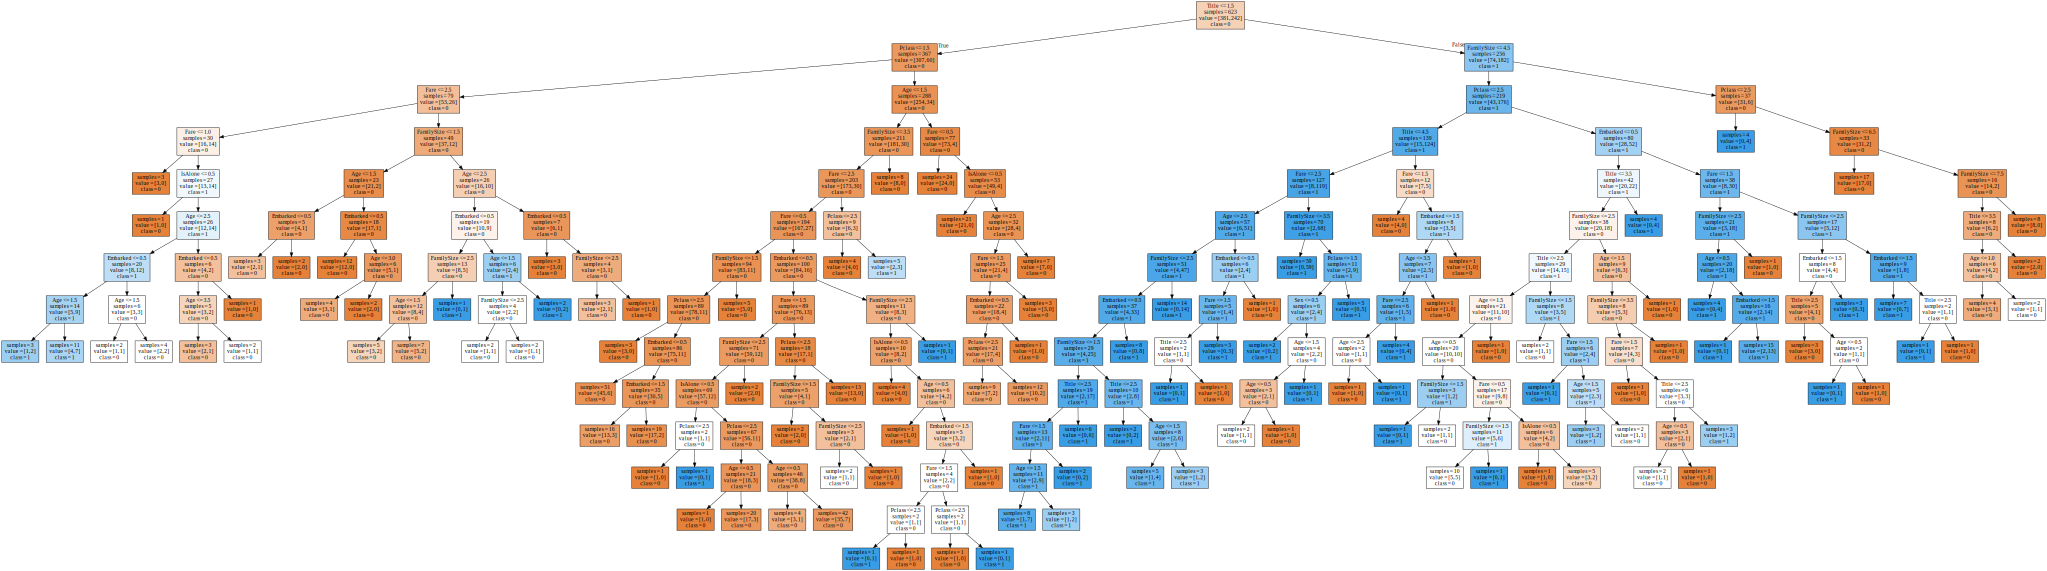

In [57]:
import graphviz
with open("tree.odt") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

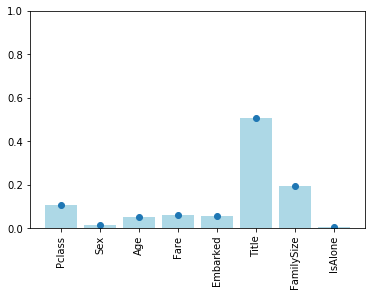

In [14]:
import matplotlib.pyplot as plt
decision_tree.feature_importances_
plt.plot(decision_tree.feature_importances_,'o')
plt.xticks(range(Titanic_train_X.shape[1]),Titanic_train_X.columns,rotation=90)
plt.bar(range(X_train.shape[1]),decision_tree.feature_importances_,color='lightblue',align='center')
plt.ylim(0,1)
plt.show()

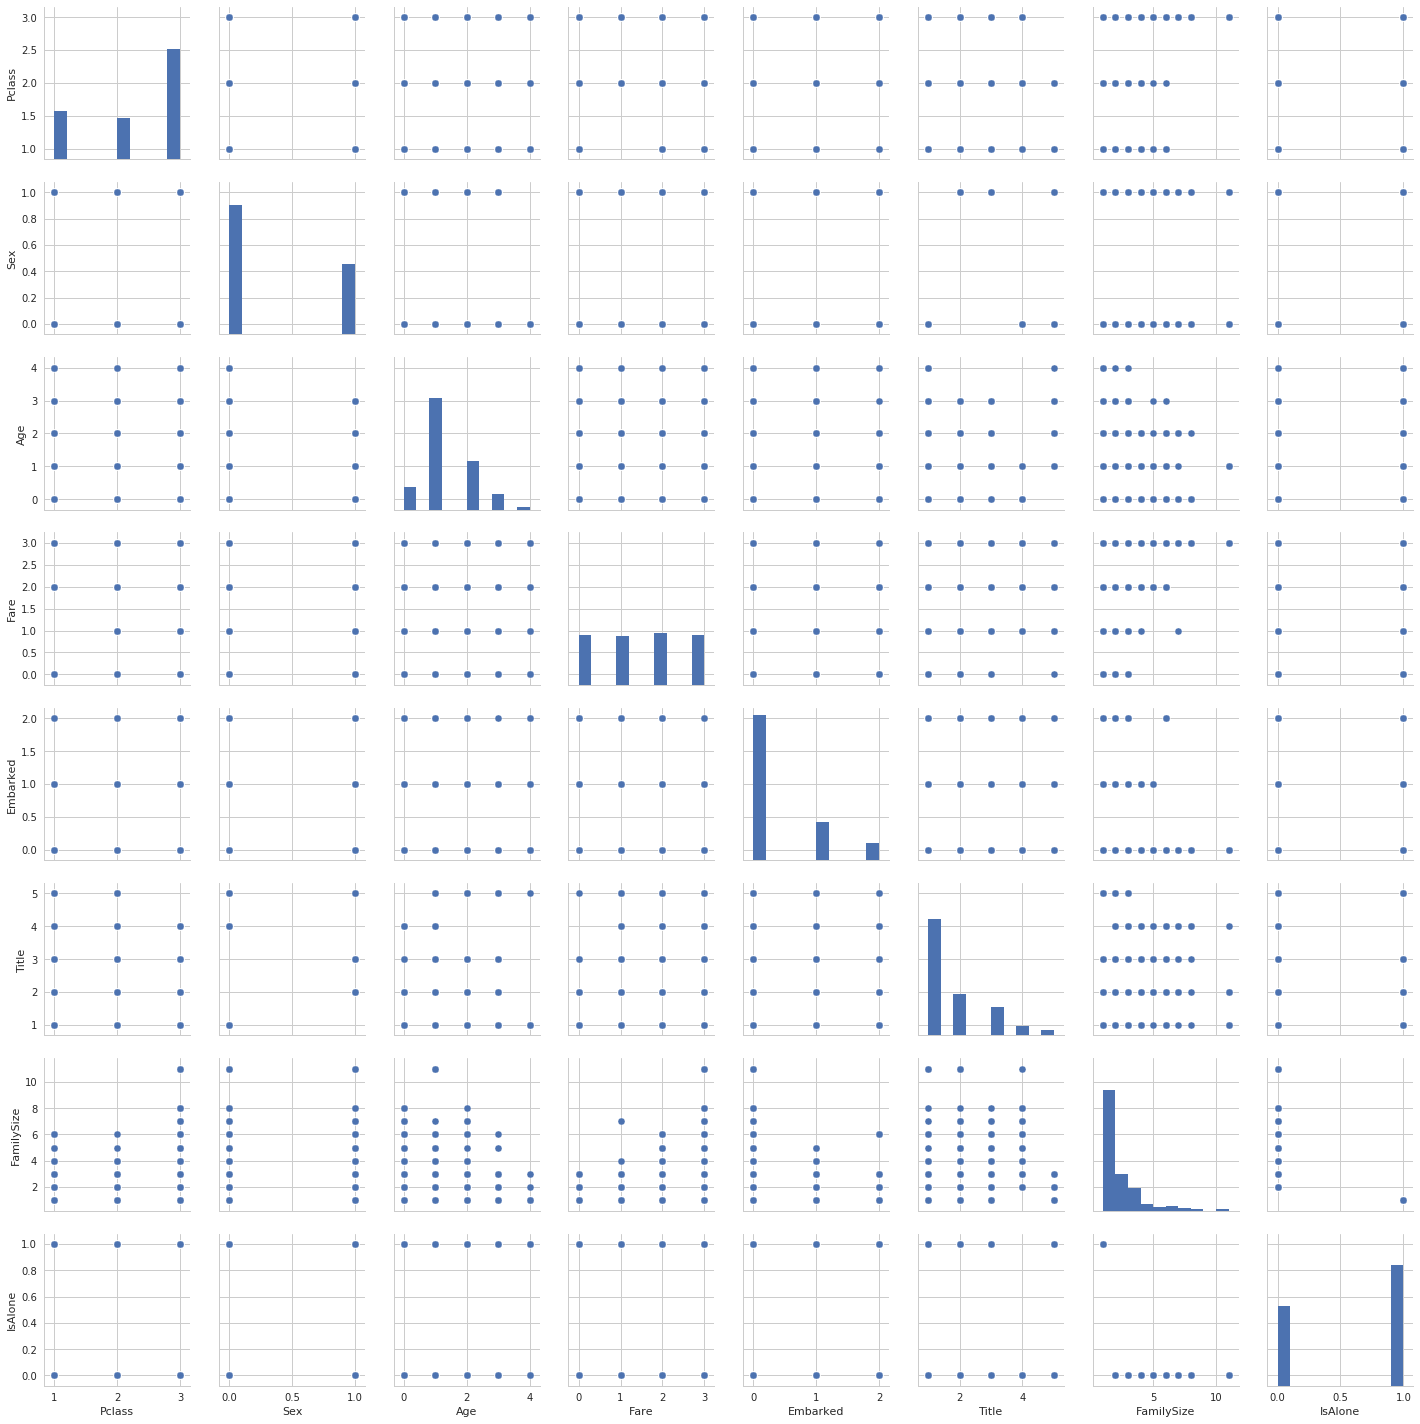

In [15]:
sb.set(style='whitegrid', context='notebook')
cols = Titanic_train_X.columns
sb.pairplot(Titanic_train_X[cols], size=2.5);
plt.show()

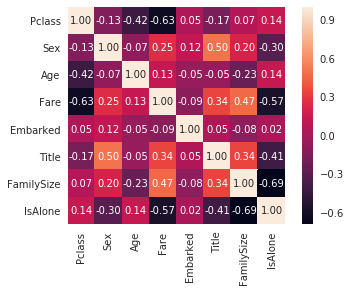

In [16]:
cm = np.corrcoef(Titanic_train_X[cols].values.T)
sb.set(font_scale=1)
hm = sb.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 10},yticklabels=cols,xticklabels=cols)
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train, Y_train)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: -0.158
Intercept: 0.716


In [18]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc


84.109999999999999

In [19]:
svc1 = SVC(kernel='linear')
svc1.fit(X_train, Y_train)
Y_pred = svc1.predict(X_test)
acc_svc1 = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc1

84.109999999999999

In [20]:
svc2 = SVC(kernel='rbf')
svc2.fit(X_train, Y_train)
Y_pred = svc2.predict(X_test)
acc_svc2 = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc2

84.109999999999999

In [30]:
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
pipe_svc = Pipeline([('clf', SVC(random_state=1))])
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,'clf__kernel': ['linear']}, {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
gs = gs.fit(X_train, Y_train)
print(gs.grid_scores_)
print(gs.best_score_)
print(gs.best_params_)

[mean: 0.61156, std: 0.00299, params: {'clf__kernel': 'linear', 'clf__C': 0.0001}, mean: 0.61156, std: 0.00299, params: {'clf__kernel': 'linear', 'clf__C': 0.001}, mean: 0.81220, std: 0.04991, params: {'clf__kernel': 'linear', 'clf__C': 0.01}, mean: 0.82343, std: 0.03918, params: {'clf__kernel': 'linear', 'clf__C': 0.1}, mean: 0.82504, std: 0.04010, params: {'clf__kernel': 'linear', 'clf__C': 1.0}, mean: 0.82665, std: 0.04218, params: {'clf__kernel': 'linear', 'clf__C': 10.0}, mean: 0.82665, std: 0.04218, params: {'clf__kernel': 'linear', 'clf__C': 100.0}, mean: 0.82665, std: 0.04218, params: {'clf__kernel': 'linear', 'clf__C': 1000.0}, mean: 0.61156, std: 0.00299, params: {'clf__gamma': 0.0001, 'clf__kernel': 'rbf', 'clf__C': 0.0001}, mean: 0.61156, std: 0.00299, params: {'clf__gamma': 0.001, 'clf__kernel': 'rbf', 'clf__C': 0.0001}, mean: 0.61156, std: 0.00299, params: {'clf__gamma': 0.01, 'clf__kernel': 'rbf', 'clf__C': 0.0001}, mean: 0.61156, std: 0.00299, params: {'clf__gamma': 0.1

In [32]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),param_grid=[ {'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],scoring='accuracy')
gs=gs.fit(X_train,Y_train)
print(gs.grid_scores_)
print(gs.best_score_)
print(gs.best_params_)

[mean: 0.78491, std: 0.03393, params: {'max_depth': 1}, mean: 0.79775, std: 0.02110, params: {'max_depth': 2}, mean: 0.82022, std: 0.03744, params: {'max_depth': 3}, mean: 0.77689, std: 0.00404, params: {'max_depth': 4}, mean: 0.79615, std: 0.02595, params: {'max_depth': 5}, mean: 0.78170, std: 0.00277, params: {'max_depth': 6}, mean: 0.78331, std: 0.02411, params: {'max_depth': 7}, mean: 0.76886, std: 0.02343, params: {'max_depth': None}]
0.8202247191011236
{'max_depth': 3}


In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

77.370000000000005

In [24]:
#Artificial Neural Network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(7,4,2))
mlp.fit(X_train,Y_train)
predictions = mlp.predict(X_test)
acc_ann=round(mlp.score(X_train,Y_train)*100,2)
acc_ann

/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


83.150000000000006